In [6]:
import pandas as pd
import numpy as np

In [7]:
import sys
sys.path.insert(0, '../src/scrapping/')

In [8]:
import Constants as const
from info_graph import InfoGraph

In [9]:
scrapping_data = pd.read_csv(const.SCRAPPING_PAGE_PATH + const.SCRAPPING_PAGE_NAME)
print(scrapping_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                             --------------  ----- 
 0   page_title                                                                                                                                                                         280 non-null    object
 1   file_name                                                                                                                                                                          280 non-null    object
 2   page_url                                                       

In [10]:
filtered_data = pd.read_csv(const.FILTERING_PAGE_PATH + const.FILTERING_PAGE_NAME)
print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   page_title  34 non-null     object
 1   file_name   34 non-null     object
 2   page_url    34 non-null     object
 3   file_url    34 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB
None


In [11]:
ig = InfoGraph()
type(ig)

info_graph.InfoGraph

<Figure size 432x288 with 0 Axes>

In [12]:
ig.set_title('serching articles - scrapping x filtering')

In [13]:
x_values = [scrapping_data.index.size, filtered_data.index.size]
x_values

[280, 34]

In [14]:
y_values = ['scrapping', 'filtering']
explode = [0.02, 0.02]

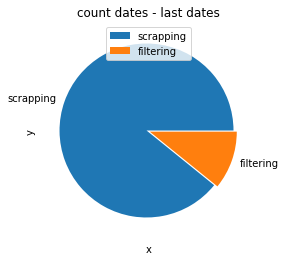

In [44]:
ig.pie(x_values, y_values, explode)

# Análise e formação dos dados
gráficos 
    -> lançamento
    -> submissão / inscrições / inscrição
    -> resultado
    -> <última data>

In [16]:
import re

In [17]:
filtered_data = pd.read_csv(const.FILTERING_PAGE_PATH + const.FILTERING_PAGE_NAME)
print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   page_title  34 non-null     object
 1   file_name   34 non-null     object
 2   page_url    34 non-null     object
 3   file_url    34 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB
None


In [18]:
cronograms = list()
relative = const.EXTRACTING_DATA_CRONOGRAM_PATH
for iteration in range(0, filtered_data.index.size):
    try:
        path = relative + '_' + str(iteration)
        cronogram = pd.read_excel(path + '/' + const.EXTRACTING_DATA_CRONOGRAM_NAME)
        
        cronograms.append(cronogram)
    except: 
        cronograms.append(None)

In [19]:
cronograms[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   atividade  11 non-null     object
 1   data       11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [20]:
search_date_for = [['lançamento'], ['submissão', 'inscrições', 'inscrição'], ['resultado']]
search_lancamento = search_date_for[0]
search_submissao = search_date_for[1]
search_resultado = search_date_for[2]

In [21]:
def regex(pattern: str, entry: str):
        return re.findall(pattern, entry)

In [22]:
date_pattern_first = r'([0-9]{2}\/[0-9]{2}\/[0-9]{4}).*$' 
date_pattern_last = r'^.*([0-9]{2}\/[0-9]{2}\/[0-9]{4})' 

In [23]:
#match = regex(date_pattern_first, '12312312/12/121212312asdasd13/13/1313')
#match # OK
#regex = lambda pattern, entry: re.findall(pattern, entry)
#match = regex(date_pattern_last, '15/06/2022 à 22/07/2022')
#len(match) > 0 # OK
#match

In [24]:
size_i = len(cronograms)
size_i

34

In [25]:
cronograms_dates = list()

size_i = len(cronograms)
for i in range(0, size_i):
    lancamento_date = np.nan
    submissao_date = np.nan
    resultado_date = np.nan
    last_date = np.nan
    
    cronogram = pd.DataFrame(cronograms[i])
    if cronogram is None : 
        cronograms_dates.append([lancamento_date, submissao_date, resultado_date, last_date])
        continue
    
    #print(cronogram.head())
    #print(cronogram.info())
    
    size_j = cronogram.index.size
    for j in range(0, size_j):
        row = str(cronogram.loc[j, 'atividade']).lower()
        
        if lancamento_date is np.nan and list(map(row.__contains__, search_lancamento)).__contains__(True):
            # print(row)
        
            # pegar as datas
            date_data = str(cronogram.loc[j, 'data']).lower()
            match = regex(date_pattern_first, date_data)
            if len(match) > 0 : lancamento_date = match[0]
            
            # print(lancamento_date)
            
        if submissao_date is np.nan and list(map(row.__contains__, search_submissao)).__contains__(True):
            # print(row)
            
            # pegar as datas
            date_data = str(cronogram.loc[j, 'data']).lower()
            match = regex(date_pattern_last, date_data)
            if len(match) > 0: submissao_date = match[0]
            
            # print(submissao_date)
            
        if resultado_date is np.nan and list(map(row.__contains__, search_resultado)).__contains__(True):
            # print(row)
            
            # pegar as datas
            date_data = str(cronogram.loc[j, 'data']).lower()
            match = regex(date_pattern_first, date_data)
            if len(match) > 0 : resultado_date = match[0]
            
            # print(resultado_date)
            
        if j == (size_j - 1):
            # print(row)
            
            # pegar as datas
            date_data = str(cronogram.loc[j, 'data']).lower()
            match = regex(date_pattern_last, date_data)
            if len(match) > 0 : last_date = match[0]
            
            # print(last_date)
    
    cronograms_dates.append([str(lancamento_date), str(submissao_date), str(resultado_date), str(last_date)])


In [26]:
cronograms_dates # ok

[['15/06/2022', '22/07/2022', '01/08/2022', '19/09/2022'],
 ['nan', 'nan', 'nan', 'nan'],
 ['24/02/2022', '17/04/2022', '25/04/2022', '29/07/2022'],
 ['15/09/2021', '25/10/2021', '03/11/2021', '23/11/2021'],
 ['nan', 'nan', 'nan', 'nan'],
 ['03/09/2021', '04/10/2021', '08/10/2021', '10/01/2022'],
 ['14/06/2021', '28/07/2021', '11/08/2021', '21/09/2021'],
 ['06/04/2021', '13/05/2021', '19/05/2021', 'nan'],
 ['nan', 'nan', 'nan', 'nan'],
 ['20/08/2020', '27/09/2020', 'nan', '27/09/2020'],
 ['nan', 'nan', 'nan', 'nan'],
 ['nan', 'nan', 'nan', 'nan'],
 ['nan', 'nan', 'nan', 'nan'],
 ['nan', 'nan', 'nan', 'nan'],
 ['17/12/2019', '15/05/2020', '17/12/2019', '15/05/2020'],
 ['nan', 'nan', 'nan', 'nan'],
 ['16/10/2019', '23/10/2019', '26/10/2019', '28/10/2019'],
 ['nan', 'nan', 'nan', 'nan'],
 ['nan', 'nan', 'nan', 'nan'],
 ['nan', 'nan', 'nan', 'nan'],
 ['16/05/2018', '25/06/2018', '09/07/2018', '27/09/2018'],
 ['16/05/2018', '02/07/2018', '16/07/2018', '25/09/2018'],
 ['16/05/2018', '02/07/2

In [27]:
columns = ['lancamento', 'submissao', 'resultado', 'last']

df_cronograms_dates = pd.DataFrame(data=cronograms_dates, columns=columns)
df_cronograms_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lancamento  34 non-null     object
 1   submissao   34 non-null     object
 2   resultado   34 non-null     object
 3   last        34 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [34]:
df_cronograms_dates = df_cronograms_dates.astype(np.datetime64)

In [35]:
df_cronograms_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   lancamento  17 non-null     datetime64[ns]
 1   submissao   17 non-null     datetime64[ns]
 2   resultado   16 non-null     datetime64[ns]
 3   last        16 non-null     datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.2 KB


In [36]:
df_cronograms_dates.head()

,lancamento,submissao,resultado,last
0,2022-06-15,2022-07-22,2022-01-08,2022-09-19
1,NaT,NaT,NaT,NaT
2,2022-02-24,2022-04-17,2022-04-25,2022-07-29
3,2021-09-15,2021-10-25,2021-03-11,2021-11-23
4,NaT,NaT,NaT,NaT


In [31]:
#values = [False, False, False]
#if values.__contains__(True):
#    print(True)
#else :
#    print(False)

In [37]:
#ig = InfoGraph()

<Figure size 432x288 with 0 Axes>

In [54]:
igs = list()

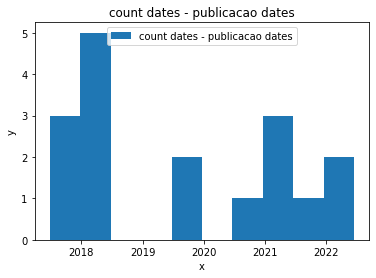

In [55]:
ig = InfoGraph()
ig.set_title('count dates - publicacao dates')
ig.hist(df_cronograms_dates.loc[:, 'lancamento'])

In [56]:
igs.append(ig)

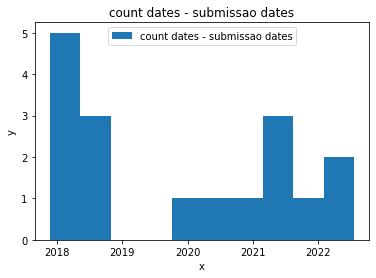

In [57]:
ig = InfoGraph()
ig.set_title('count dates - submissao dates')
ig.hist(df_cronograms_dates.loc[:,'submissao'])

In [58]:
igs.append(ig)

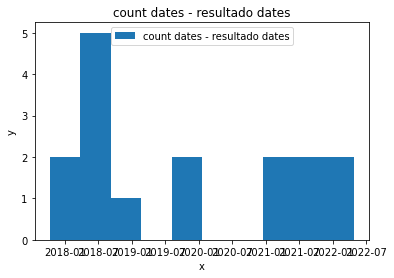

In [61]:
ig = InfoGraph()
ig.set_title('count dates - resultado dates')
ig.hist(df_cronograms_dates.loc[:, 'resultado'])

In [62]:
igs.append(ig)

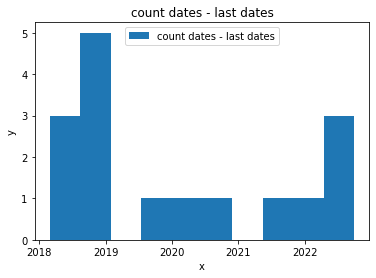

In [63]:
ig = InfoGraph()
ig.set_title('count dates - last dates')
ig.hist(df_cronograms_dates.loc[:,'last'])

In [64]:
igs.append(ig)

In [75]:
def show_from_fig(fig:InfoGraph)->...:
    fig_show(fig.show)

def fig_show(show:...):
    show()

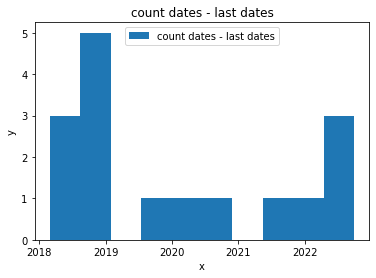

In [79]:
show_from_fig(igs[3])